In [1]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *
from dwave.embedding.chain_strength import scaled
import pandas as pd
from brute_force import get_bqm_random_sat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 1
qpu = get_qpu()

In [3]:
df_embeddings = df = pd.read_csv("./rnd_best_embeddings.csv")
df_embeddings

,num_variables,num_clauses,var_clause_rel,max_chain_length,num_qubits,variance
0,20,35,0.57,3,88,0.47
1,20,30,0.67,3,72,0.37
2,15,45,0.33,4,102,0.99
3,15,40,0.38,4,90,0.79
4,15,35,0.43,3,76,0.62
5,15,30,0.50,3,71,0.48
6,15,25,0.60,3,54,0.33
7,15,20,0.75,2,46,0.22
8,15,15,1.00,2,34,0.12
9,10,25,0.40,3,48,0.36


# Quantum Sampler

In [4]:
def find_best_chain_strength(bqm, embedding, top_chain_strength, clauses, file_name):
    chain_strengths = []
    precisions = []
    for chain_strength in list(np.arange(1.0, top_chain_strength + 0.25, 0.25)):
        chain_strengths.append(chain_strength)
        precisions.append(sample_with_sampler(embedding, bqm, 100, chain_strength, clauses))
    current_df = pd.DataFrame({
     'chain_strength': chain_strengths,
     'precision': precisions,
     })  
    current_df.to_csv(f"./rnd_cnf_precision/{file_name}.csv")
    return current_df
    

## 10 variables

In [7]:
for (n_clauses, random_seed) in [(10, 100), (15, 94), (20, 73), (25, 95)]:
    bqm, clauses = get_bqm_random_sat(10, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seed)
    print(scaled(bqm, embedding), max(bqm.quadratic.values()) )

6.0 4.0
8.0 4.0
8.0 4.0
16.0 4.0


In [15]:
# bqm, clauses = get_bqm_random_sat(10, 10, seed)
# embedding = get_embedding(bqm, qpu, 100)
# current_df = find_best_chain_strength(bqm, embedding, 6.0, clauses, "v10_c10")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

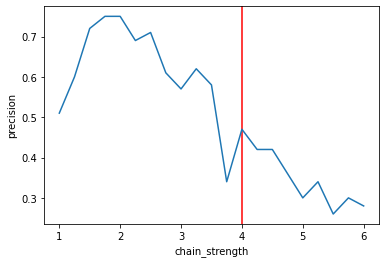

In [31]:
df = pd.read_csv("./rnd_cnf_precision/v10_c10.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [17]:
# bqm, clauses = get_bqm_random_sat(10, 15, seed)
# embedding = get_embedding(bqm, qpu, 94)
# current_df = find_best_chain_strength(bqm, embedding, 8.0, clauses, "v10_c15")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

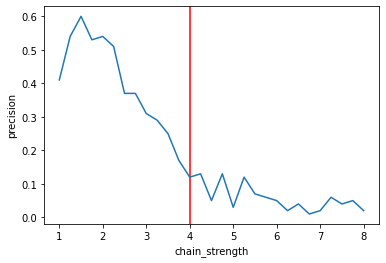

In [32]:
df = pd.read_csv("./rnd_cnf_precision/v10_c15.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [19]:
# bqm, clauses = get_bqm_random_sat(10, 20, seed)
# embedding = get_embedding(bqm, qpu, 73)
# current_df = find_best_chain_strength(bqm, embedding, 8.0, clauses, "v10_c20")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

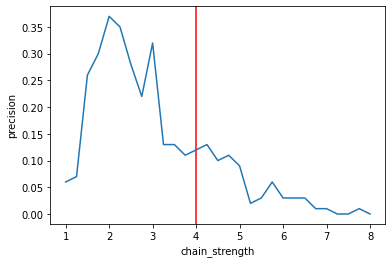

In [33]:
df = pd.read_csv("./rnd_cnf_precision/v10_c20.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [21]:
# bqm, clauses = get_bqm_random_sat(10, 25, seed)
# embedding = get_embedding(bqm, qpu, 95)
# current_df = find_best_chain_strength(bqm, embedding, 16.0, clauses, "v10_c25")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

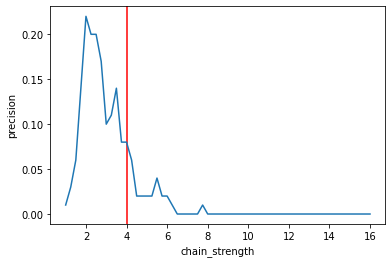

In [34]:
df = pd.read_csv("./rnd_cnf_precision/v10_c25.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

## 15 variables

In [34]:
for (n_clauses, random_seed) in [(15, 74), (20, 88), (25, 1), (30, 54), (35, 63), (40, 3), (45, 16)]:
    bqm, clauses = get_bqm_random_sat(15, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seed)
#     temp = []
#     for val in bqm.quadratic.values():
#         temp.append(abs(val))
#     print(max(temp))
    print(n_clauses,random_seed,max(bqm.quadratic.values()) )

15 74 4.0
20 88 4.0
25 1 4.0
30 54 4.0
35 63 6.0
40 3 6.0
45 16 6.0


In [6]:
# bqm, clauses = get_bqm_random_sat(15, 15, seed)
# embedding = get_embedding(bqm, qpu, 74)
# current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c15")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

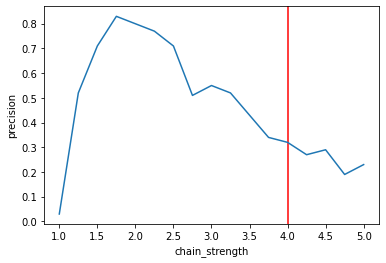

In [24]:
df = pd.read_csv("./rnd_cnf_precision/v15_c15.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [12]:
# bqm, clauses = get_bqm_random_sat(15, 20, seed)
# embedding = get_embedding(bqm, qpu, 88)
# current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c20")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

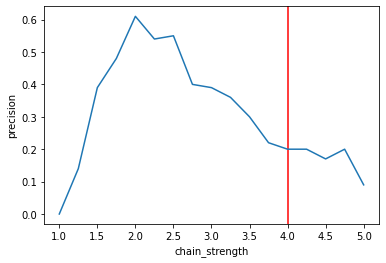

In [25]:
df = pd.read_csv("./rnd_cnf_precision/v15_c20.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [14]:
# bqm, clauses = get_bqm_random_sat(15, 25, seed)
# embedding = get_embedding(bqm, qpu, 1)
# current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c25")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

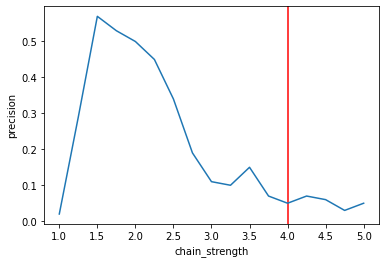

In [26]:
df = pd.read_csv("./rnd_cnf_precision/v15_c25.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [17]:
# bqm, clauses = get_bqm_random_sat(15, 30, seed)
# embedding = get_embedding(bqm, qpu, 54)
# current_df = find_best_chain_strength(bqm, embedding, 5.0, clauses, "v15_c30")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

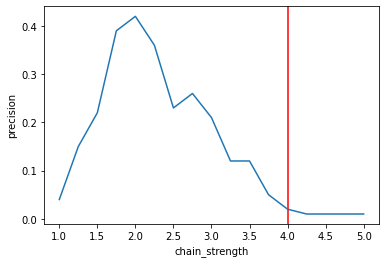

In [27]:
df = pd.read_csv("./rnd_cnf_precision/v15_c30.csv")
plt.axvline(4, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [19]:
# bqm, clauses = get_bqm_random_sat(15, 35, seed)
# embedding = get_embedding(bqm, qpu, 63)
# current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c35")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

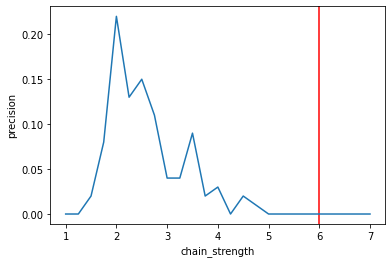

In [28]:
df = pd.read_csv("./rnd_cnf_precision/v15_c35.csv")
plt.axvline(6, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [21]:
# bqm, clauses = get_bqm_random_sat(15, 40, seed)
# embedding = get_embedding(bqm, qpu, 3)
# current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c40")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

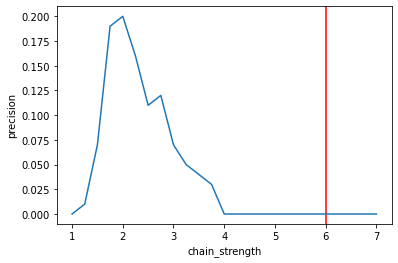

In [29]:
df = pd.read_csv("./rnd_cnf_precision/v15_c40.csv")
plt.axvline(6, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [23]:
# bqm, clauses = get_bqm_random_sat(15, 45, seed)
# embedding = get_embedding(bqm, qpu, 16)
# current_df = find_best_chain_strength(bqm, embedding, 7.0, clauses, "v15_c45")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

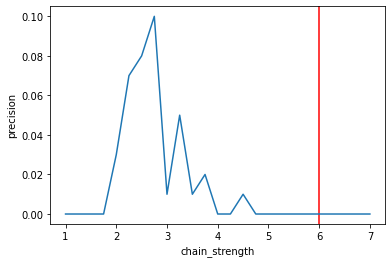

In [30]:
df = pd.read_csv("./rnd_cnf_precision/v15_c45.csv")
plt.axvline(6, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

## 20 variables

In [36]:
for (n_clauses, random_seed) in [(30, 55), (35, 27)]:
    bqm, clauses = get_bqm_random_sat(20, n_clauses, seed)
    embedding = get_embedding(bqm, qpu, random_seed)
#     temp = []
#     for val in bqm.quadratic.values():
#         temp.append(abs(val))
#     print(max(temp))
    print(scaled(bqm, embedding), max(bqm.quadratic.values()) )

12.0 5.0
14.0 5.0


In [23]:
# bqm, clauses = get_bqm_random_sat(20, 30, seed)
# embedding = get_embedding(bqm, qpu, 55)
# current_df = find_best_chain_strength(bqm, embedding, 12.0, clauses, "v20_c30")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

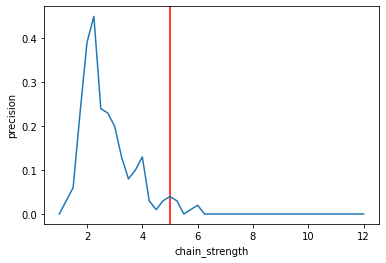

In [35]:
df = pd.read_csv("./rnd_cnf_precision/v20_c30.csv")
plt.axvline(5, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [25]:
# bqm, clauses = get_bqm_random_sat(20, 35, seed)
# embedding = get_embedding(bqm, qpu, 27)
# current_df = find_best_chain_strength(bqm, embedding, 14.0, clauses, "v20_c35")

<AxesSubplot:xlabel='chain_strength', ylabel='precision'>

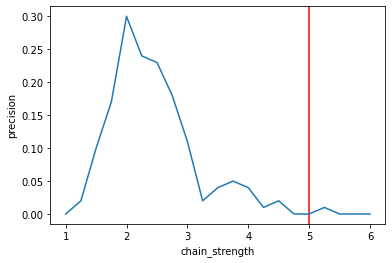

In [36]:
df = pd.read_csv("./rnd_cnf_precision/v20_c35.csv")
plt.axvline(5, 0,1.0,color='r')
sns.lineplot(data=df, x="chain_strength", y="precision")

In [39]:
current_df["vars"] = 20
current_df

,chain_strength,precision,vars
0,1.00,0.00,20
1,1.25,0.00,20
2,1.50,0.00,20
3,1.75,0.00,20
4,2.00,0.03,20
5,2.25,0.07,20
6,2.50,0.08,20
7,2.75,0.10,20
8,3.00,0.01,20
9,3.25,0.05,20


# Merging Results

In [101]:
def get_best_results():
    vars_to_clauses = {
        10: [10, 15, 20, 25],
        15: [15, 20, 25, 30, 35, 40, 45],
        20: [30, 35]
    }

    total_rows = 0
    nvars_series = []
    nclauses_series = []
    chain_strengths = []
    precisions = []
    coeffs = []
    for (n_vars, n_clauses_arr) in vars_to_clauses.items():
        for n_clauses in n_clauses_arr:
            current_df = pd.read_csv(f"./rnd_cnf_precision/v{n_vars}_c{n_clauses}.csv")[["chain_strength", "precision"]]
            best_chain_strength = current_df.loc[current_df['precision'].idxmax()]['chain_strength']
            best_precision = current_df.loc[current_df['precision'].idxmax()]['precision']
            bqm, clauses = get_bqm_random_sat(n_vars, n_clauses, seed)
            nvars_series.append(n_vars)
            nclauses_series.append(n_clauses)
            chain_strengths.append(best_chain_strength)
            precisions.append(best_precision)
            coeffs.append(max(bqm.quadratic.values()))
            
    df = pd.DataFrame({
        'vars': nvars_series,
        'clauses': nclauses_series,
        'chain_strength':chain_strengths,
        'precision': precisions,
        'max_coeff': coeffs
    })
    return df
        

In [102]:
df_chain_strengths = get_best_results()
df_chain_strengths

,vars,clauses,chain_strength,precision,max_coeff
0,10,10,1.75,0.75,4.0
1,10,15,1.50,0.60,4.0
2,10,20,2.00,0.37,4.0
3,10,25,2.00,0.22,4.0
4,15,15,1.75,0.83,4.0
5,15,20,2.00,0.61,4.0
6,15,25,1.50,0.57,4.0
7,15,30,2.00,0.42,4.0
8,15,35,2.00,0.22,6.0
9,15,40,2.00,0.20,6.0


In [85]:
df_embeddings = pd.read_csv("./rnd_best_embeddings.csv")
df_embeddings

,num_variables,num_clauses,var_clause_rel,max_chain_length,num_qubits,variance
0,20,35,0.57,3,88,0.47
1,20,30,0.67,3,72,0.37
2,15,45,0.33,4,102,0.99
3,15,40,0.38,4,90,0.79
4,15,35,0.43,3,76,0.62
5,15,30,0.50,3,71,0.48
6,15,25,0.60,3,54,0.33
7,15,20,0.75,2,46,0.22
8,15,15,1.00,2,34,0.12
9,10,25,0.40,3,48,0.36


In [103]:
merged_data = pd.merge(
    df_chain_strengths, 
    df_embeddings,  
    how='left', 
    left_on=['vars','clauses'], 
    right_on = ['num_variables','num_clauses'])
merged_data = merged_data.drop(['num_variables', 'num_clauses'],axis=1)
merged_data

,vars,clauses,chain_strength,precision,max_coeff,var_clause_rel,max_chain_length,num_qubits,variance
0,10,10,1.75,0.75,4.0,1.00,2,21,0.05
1,10,15,1.50,0.60,4.0,0.67,2,30,0.17
2,10,20,2.00,0.37,4.0,0.50,2,39,0.22
3,10,25,2.00,0.22,4.0,0.40,3,48,0.36
4,15,15,1.75,0.83,4.0,1.00,2,34,0.12
5,15,20,2.00,0.61,4.0,0.75,2,46,0.22
6,15,25,1.50,0.57,4.0,0.60,3,54,0.33
7,15,30,2.00,0.42,4.0,0.50,3,71,0.48
8,15,35,2.00,0.22,6.0,0.43,3,76,0.62
9,15,40,2.00,0.20,6.0,0.38,4,90,0.79


In [104]:
merged_data.corr()

,vars,clauses,chain_strength,precision,max_coeff,var_clause_rel,max_chain_length,num_qubits,variance
vars,1.000000,0.554794,0.348743,-0.172387,0.449461,-0.072592,0.423634,0.664071,0.373378
clauses,0.554794,1.000000,0.701561,-0.863465,0.847060,-0.799627,0.927585,0.986132,0.964289
chain_strength,0.348743,0.701561,1.000000,-0.662053,0.615634,-0.504374,0.586667,0.694733,0.710710
precision,-0.172387,-0.863465,-0.662053,1.000000,-0.711896,0.946264,-0.791842,-0.793034,-0.850289
max_coeff,0.449461,0.847060,0.615634,-0.711896,1.000000,-0.566021,0.772619,0.828525,0.862629
var_clause_rel,-0.072592,-0.799627,-0.504374,0.946264,-0.566021,1.000000,-0.747955,-0.712435,-0.798043
max_chain_length,0.423634,0.927585,0.586667,-0.791842,0.772619,-0.747955,1.000000,0.896920,0.929696
num_qubits,0.664071,0.986132,0.694733,-0.793034,0.828525,-0.712435,0.896920,1.000000,0.927800
variance,0.373378,0.964289,0.710710,-0.850289,0.862629,-0.798043,0.929696,0.927800,1.000000


In [108]:
df_ratio_sat = pd.read_csv("./random_cnfs.csv")
df_ratio_sat = df_ratio_sat.drop(['Unnamed: 0'], axis=1)
merged_data2 = pd.merge(
    merged_data, 
    df_ratio_sat,  
    how='left', 
    left_on=['vars','clauses'], 
    right_on = ['variables','clauses'])

merged_data2 = merged_data2.drop(['variables'], axis=1)

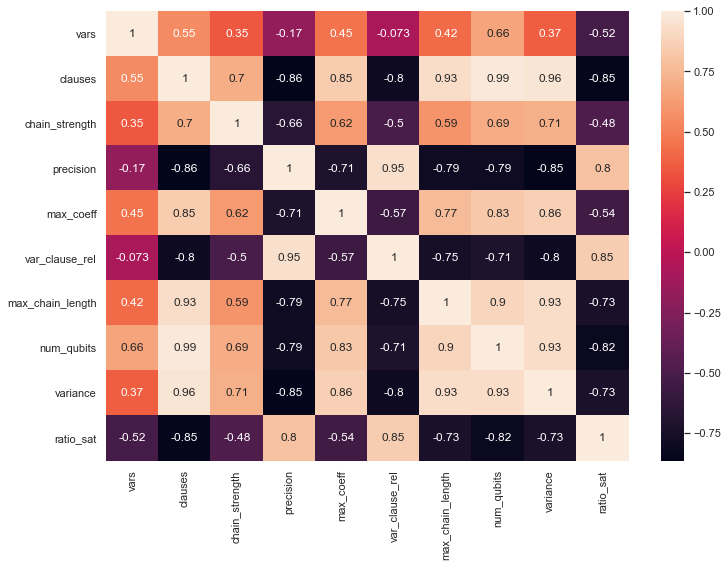

In [115]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(merged_data2.corr(), cbar=True, annot=True)

In [116]:
merged_data2.to_csv("./final_results.csv")